<a href="https://colab.research.google.com/github/masa512/ece558/blob/main/set2_problem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import scipy.signal
import math

## Part A

In [154]:
# We can form toeplitz this way

def linear_conv_matrix(h,N,orig_h_size):
  # Performs 1D Conv over vector (takes adv of toeplitz)
  """
  Inputs: 

  h : (L,) Unit pulse response
  input_size : (int) Size of the input vector
  """

  # Evaluate output length 
  # Pad h by zeros 
  row =h 

  # Make col
  input_size = h.shape[0] +1
  col = np.pad(np.array([h[0]]),(0,h.shape[0]-orig_h_size),constant_values=(0,0))

  # Generate toeplitz matrix

  C = scipy.linalg.toeplitz(col,row)

  return C


def lin_conv_2d(H,N1,N2):
  # Pad H
  Hpad = np.pad(H,((0,N1-H.shape[0]),(0,N2-H.shape[1])),constant_values=((0,0),(0,0)))
  # Vectorize H
  Hvec = np.reshape(Hpad,-1,'F')

  # Run a list comprehension
  row = [linear_conv_matrix(Hvec[i*N1:(i+1)*N1],N=N1,orig_h_size=H.shape[0]) for i in range(N2)]
  # Initiate a C array
  ht = (Hpad.shape[0]-H.shape[0]+1)
  wd = N1
  C = np.zeros((N2*ht,N2*wd))

  # Run a loop
  comp = np.zeros((ht,wd))
  for i in range(N2):
    for j in range(N2):
      idx = i + j
      if idx < len(row):
        C[ht*i:ht*(i+1),wd*idx:wd*(idx+1)] = row[j]
      
  return C



In [160]:
def linear_conv_matrix(h,N):
  # Performs 1D Conv over vector (takes adv of toeplitz)
  """
  Inputs: 

  h : (L,) Unit pulse response
  input_size : (int) Size of the input vector
  """
  # Evaluate output length 
  # Pad h by zeros 
  row = np.pad(h,((0,N-h.shape[0]),(0,N-h.shape[1])))
  # Make col
  col = np.pad(np.array([h[0]]),(0,N-h.shape[0]+1),constant_values=(0,0))
  # Generate toeplitz matrix
  C = scipy.linalg.toeplitz(col,row)
  return C 

def linear_conv_2D(H,N1,N2):
  

4 4
[[ 1 -1  0  0]
 [ 1 -1  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


Text(0.5, 1.0, 'Toeplitz Conv Matrix 2D')

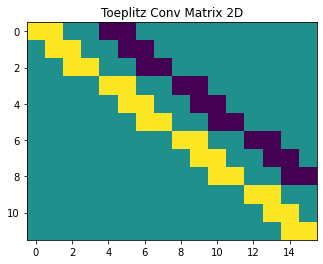

In [159]:

H = np.array([[1,-1],[1,-1]])
X = np.array([[1,1,1],[1,1,1],[1,1,1]])
N1 = H.shape[0] + X.shape[0] - 1
N2 = H.shape[1] + X.shape[1] - 1

print(N1,N2)


Xpadded = np.pad(X,((0,N1-X.shape[0]),(0,N2-X.shape[1])),constant_values = ((0,0),(0,0)))
C = lin_conv_2d(H,N1,N2) 

plt.figure()
plt.imshow(C)
plt.title('Toeplitz Conv Matrix 2D')

[[1 2 1 2]
 [4 6 4 6]
 [4 6 4 6]
 [3 4 3 4]]


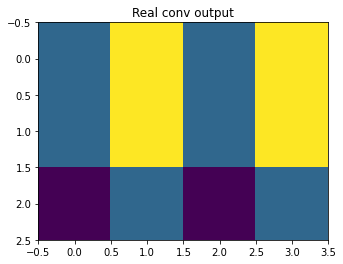

In [143]:
# Try real conv

Y_real = scipy.signal.convolve2d(H, X)
plt.figure()
plt.imshow(Y_real[1:,:])
plt.title('Real conv output')

print(Y_real)

## Part B

In [182]:
def cconv2(X,H,N1,N2):
  # Pad X and H to the shape N1 by N2
  H = np.pad(H,((0,N1-H.shape[0]),(0,N2-H.shape[1])),constant_values=((0,0),(0,0)))
  X = np.pad(X,((0,N1-X.shape[0]),(0,N2-X.shape[1])),constant_values=((0,0),(0,0)))

  # Perform DFT2 
  fH = np.fft.fft2(H)
  fX = np.fft.fft2(X)
  fY = fH*fX

  # Inverse FFT
  Y = np.fft.ifft2(fY)

  return np.round(np.real(Y)).astype(int)


Text(0.5, 1.0, 'Output Using conv 2d')

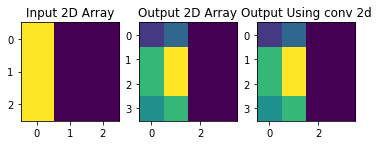

In [259]:
H = np.array([[1,2],[3,4]])
X = np.array([[1,0,0],[1,0,0],[1,0,0]])
Y = cconv2(X,H,4,4)

fig,axes = plt.subplots(1,3)
axes[0].imshow(X)
axes[0].set_title('Input 2D Array')

axes[1].imshow(Y)
axes[1].set_title('Output 2D Array')

Y1 = scipy.signal.convolve2d(H, X)

axes[2].imshow(Y1)
axes[2].set_title('Output Using conv 2d')

## Part C

In [261]:
def cconvmtx2(H,xdim1,xdim2,N1,N2):
  basis_vectors = np.diag(np.ones(xdim1*xdim2))

  C = np.array([cconv2(basis_vectors[:,i].reshape((xdim1,xdim2)),H,N1,N2).reshape(-1) for i in range(xdim1*xdim2)]).T
  return C

Text(0.5, 1.0, 'CCONV matrix')

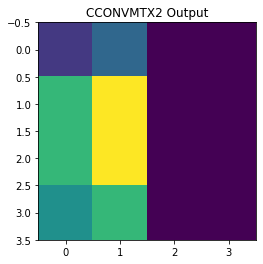

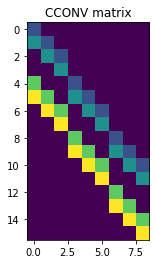

In [267]:
N1 = H.shape[0]+X.shape[0]-1
N2 = H.shape[1]+X.shape[1]-1

C = cconvmtx2(H,X.shape[0],X.shape[1],N1,N2)
x = X.reshape(-1)
Y1 = np.reshape(C@x,(N1,N2))

plt.figure()
plt.imshow(Y1)
plt.title('CCONVMTX2 Output')

plt.figure()
plt.imshow(C)
plt.title('CCONV matrix')

## Part D

In [330]:
def eval_fft(i,j,N1,N2):
  
  #F = np.array([[math.e**(-1j*2*np.pi*(1/N1*i*k1 + 1/N2*j*k2)) for k2 in range(N2)] for k1 in range(N1)])
  F = np.zeros((N1,N2))
  F[i,j] = 1
  F = np.fft.fft2(F)
  return F.reshape(-1)

def dtfmtx2(N1,N2):
  F = np.array([[eval_fft(i,j,N1,N2)for i in range(N1)] for j in range(N2)])
  F = F.reshape((N1*N2,-1))
  print(F.shape)
  return F
  

(9, 9)


Text(0.5, 1.0, 'Using NP')

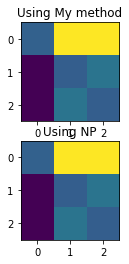

In [342]:
H = np.array([[2,-9,3],[1,-8,1],[0,0,0]])
N1,N2 = H.shape

F = dtfmtx2(N1,N2)

# Vectorize H
h = H.reshape(-1)
fH1 = (F@h).reshape((N1,N2))

# Real FFT
fH2 = np.fft.fft2(H)

fig,axes = plt.subplots(2)
axes[0].imshow(abs(fH1).T)
axes[0].set_title('Using My method')

axes[1].imshow(abs(fH2))
axes[1].set_title('Using NP')
